<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/ode01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Goal__

We want to solve ODE
$$u'(x) - 1 = 0, u(0) = 0, x\in [0,1]$$
with neural network and compare this with true solution $u(x) = x$.

__Method__

- Build a neural network, say $v(x;w)$, where $x$ is 1-d input and $w$ is weight. 
- Set loss function as
$$l(w) = \frac{1}{10}\sum_{j=1}^{10} \Big(\frac{\partial}{\partial_x} v(j/10, w) - 1 \Big)^2 + (v(0) - 0)^2.$$
- Use an optimizer to minimize the loss


In [0]:
import torch
import torch.nn as nn
from torch.autograd import grad

In [0]:
#parameters

drift = 1.
run_cost = -1.
boundary = 0.

l_bd = 0.
r_bd = 1.
mesh_n = 10
mesh_x = torch.linspace(l_bd, r_bd, mesh_n +1, dtype = torch.float, requires_grad=True).reshape(mesh_n+1,1)


In [0]:
model = nn.Linear(1, 1) #model for solution

In [0]:
#loss in the interior
def loss1(model, mesh_x, drift, run_cost):
  loss = 0.
  for x in mesh_x[1:]:
    y = model(x) #function value
    y_g1 = grad(y, x, create_graph=True)[0] #first order derivative
    loss = loss + torch.pow(y_g1*drift + run_cost, 2)
    
  return torch.div(loss, mesh_x.shape[0])

#loss_total = loss interior + loss boundary
def loss_tot(model, mesh_x, drfit, run_cost, boundary):
  l1 = loss1(model, mesh_x, drift, run_cost) #loss interior
  l0 = torch.pow(model(mesh_x[0]) - boundary, 2) #loss boundary
  return torch.add(l1,l0)

#loss_tot(model, mesh_x, drift, run_cost, boundary)  

In [0]:
#optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# Train the model
num_epochs = 40

for epoch in range(num_epochs):

    # Forward pass
    loss = loss_tot(model, mesh_x, drift, run_cost, boundary)  
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 2 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))

Epoch [2/40], Loss: 0.2115
Epoch [4/40], Loss: 0.0900
Epoch [6/40], Loss: 0.0384
Epoch [8/40], Loss: 0.0164
Epoch [10/40], Loss: 0.0070
Epoch [12/40], Loss: 0.0030
Epoch [14/40], Loss: 0.0013
Epoch [16/40], Loss: 0.0006
Epoch [18/40], Loss: 0.0002
Epoch [20/40], Loss: 0.0001
Epoch [22/40], Loss: 0.0000
Epoch [24/40], Loss: 0.0000
Epoch [26/40], Loss: 0.0000
Epoch [28/40], Loss: 0.0000
Epoch [30/40], Loss: 0.0000
Epoch [32/40], Loss: 0.0000
Epoch [34/40], Loss: 0.0000
Epoch [36/40], Loss: 0.0000
Epoch [38/40], Loss: 0.0000
Epoch [40/40], Loss: 0.0000


In [0]:
import numpy as np
import matplotlib.pyplot as plt

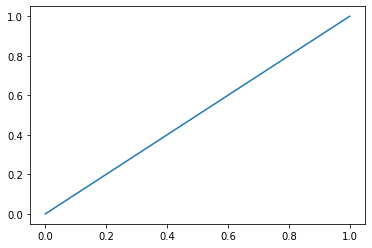

In [8]:
x_np = mesh_x.detach().numpy()
y_np = model(mesh_x).detach().numpy()
plt.plot(x_np, y_np)